In [19]:
#-----------------------------------------------------------------------------------
#DATA LOADING
#-----------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")

%matplotlib inline


df_classifier = pd.read_csv("Classifier.csv")
df_spect = pd.read_csv("Spectrums.csv")

# Deletion of unnecessary column
df_spect = df_spect.drop(columns=['Unnamed: 0'])


(101406, 6)

In [23]:
#Transformation of the string columns "bp" and "rp" to array(float)
tic = timeit.default_timer()

for i in range(len(df_spect)):
    df_spect["bp"][i] = np.fromstring(df_spect["bp"][i][1:-1], dtype=float, sep=', ')
    df_spect["rp"][i] = np.fromstring(df_spect["rp"][i][1:-1], dtype=float, sep=', ')
#-------------------------------------------------------------
    #Counter
    if  i % 10000 == 0:
        print("Link {}".format(i))
#-------------------------------------------------------------
toc = timeit.default_timer()
print ("Computation time = " + str((toc - tic)) + "s") 

Link 0
Link 10000
Link 20000
Link 30000
Link 40000
Link 50000
Link 60000
Link 70000
Link 80000
Link 90000
Link 100000
Computation time = 341.25598390000005s


In [21]:
df_spect["bp"][0]

'[0.6473, -0.3848, -1.4169, 0.551, 0.5189, 1.4868, 0.4547, 2.4226, 4.3904, -0.6417, -0.6738, -0.7059, 1.262, 0.2299, 0.1978, 3.1656, 7.1335, 6.1014, 0.0693, 5.0372, 1.0051, 4.973, 2.9409, 5.9087, 2.8766, 5.8445, 7.8124, 10.7803, 13.7482, 15.7161, 16.6839, 21.6518, 16.6197, 17.5876, 24.5555, 21.5234, 35.4913, 26.4591, 27.427, 24.3949, 28.3628, 39.3307, 39.2986, 39.2665, 44.2344, 38.2022, 32.1701, 20.138, 5.1059, 3.0738, 3.0417, -0.9904, 2.9774, -3.0547, -4.0868, 1.8811, -0.151, 0.8169, -3.2152, 0.7527]'

In [6]:
#-----------------------------------------------------------------------------------
#CALCULATION OF THE NUMBER OF SPECTRUMS FOR EACH CLASS
#-----------------------------------------------------------------------------------

def filter_dataframe(data, class_comment = True):
    
    feature, number_spectrums = np.unique(data["feature"], return_counts=True)
    name_id = np.unique(data["id"])
    
    feat = []
    for j in name_id:
        feat.append(list(data["feature"][data["id"]== j])[0])

    feature1 , frequency = np.unique(feat, return_counts=True)

    table_filter = { "feature": feature, 
                     "frecuencia": frequency,
                     "spectrums": number_spectrums}
    if class_comment==True:
        class_comment = []   
        for i in feature:
            class_comment.append(list(df_classifier["Class_Comment"][df_classifier["Feature"]== i])[0])
        table_filter["class_comment"] = class_comment
    
    df_filter = pd.DataFrame(table_filter)
    return df_filter.sort_values(by=['spectrums', 'frecuencia'], ascending=False)


df_filter = filter_dataframe(df_spect).reset_index(drop=True)
df_filter

,feature,frecuencia,spectrums,class_comment
0,QSO,633,46355,Class
1,CV,457,21786,Class
2,YSO,134,8509,Class
3,SN Ia,1364,8152,Class
4,AGN,78,5567,Class
5,BL Lac,51,3644,Class
6,SN II,419,3329,Class
7,SN IIn,87,1236,Class
8,blue hostless transient,280,1074,Comment
9,apparently blue hostless transient,183,718,Comment


Text(0, 0.5, 'Frequency')

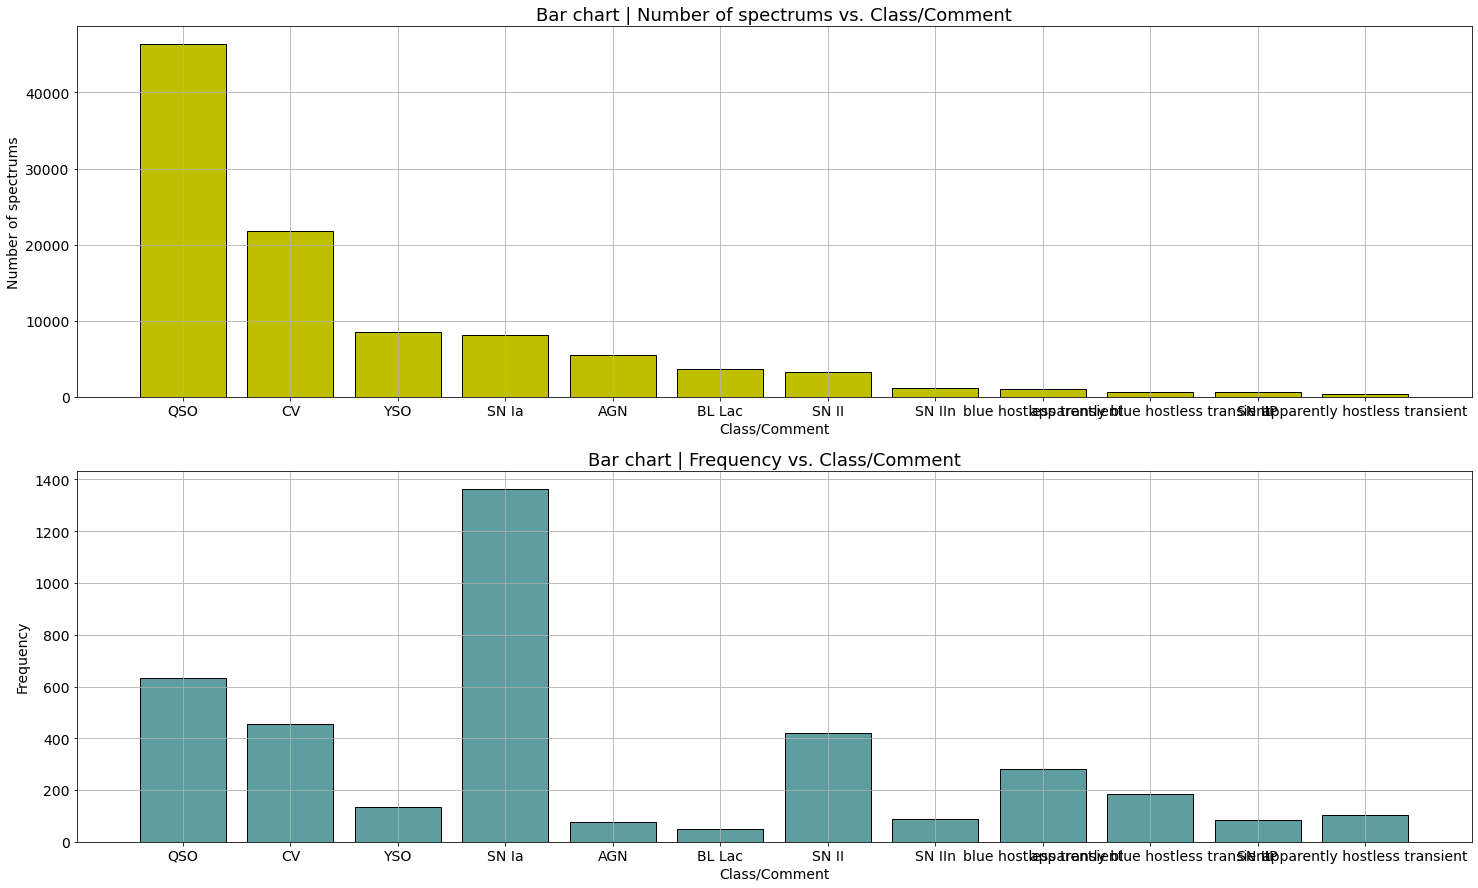

In [21]:
#BAR CHART, SPECTRUMS

mpl.rcParams['font.size'] = 14
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
plt.bar(df_filter["feature"], df_filter["spectrums"], color='y',  edgecolor = 'black')
plt.grid()
plt.title("Bar chart | Number of spectrums vs. Class/Comment", fontsize = 18 )  
plt.xlabel("Class/Comment", fontsize = 14 )  
plt.ylabel("Number of spectrums", fontsize = 14 )  



#BAR CHART, FREQUENCY
plt.subplot(2,1,2)
plt.bar(df_filter["feature"], df_filter["frecuencia"], color='cadetblue',  edgecolor = 'black')
plt.grid()
plt.title("Bar chart | Frequency vs. Class/Comment", fontsize = 18 )  
plt.xlabel("Class/Comment", fontsize = 14 )  
plt.ylabel("Frequency", fontsize = 14 )

In [32]:
df_filter["feature"][df_filter["feature"]== "blue hostless transient"]="bht"
df_filter["feature"][df_filter["feature"]== "apparently blue hostless transient"]="abht"
df_filter["feature"][df_filter["feature"]== "apparently hostless transient"]="aht"

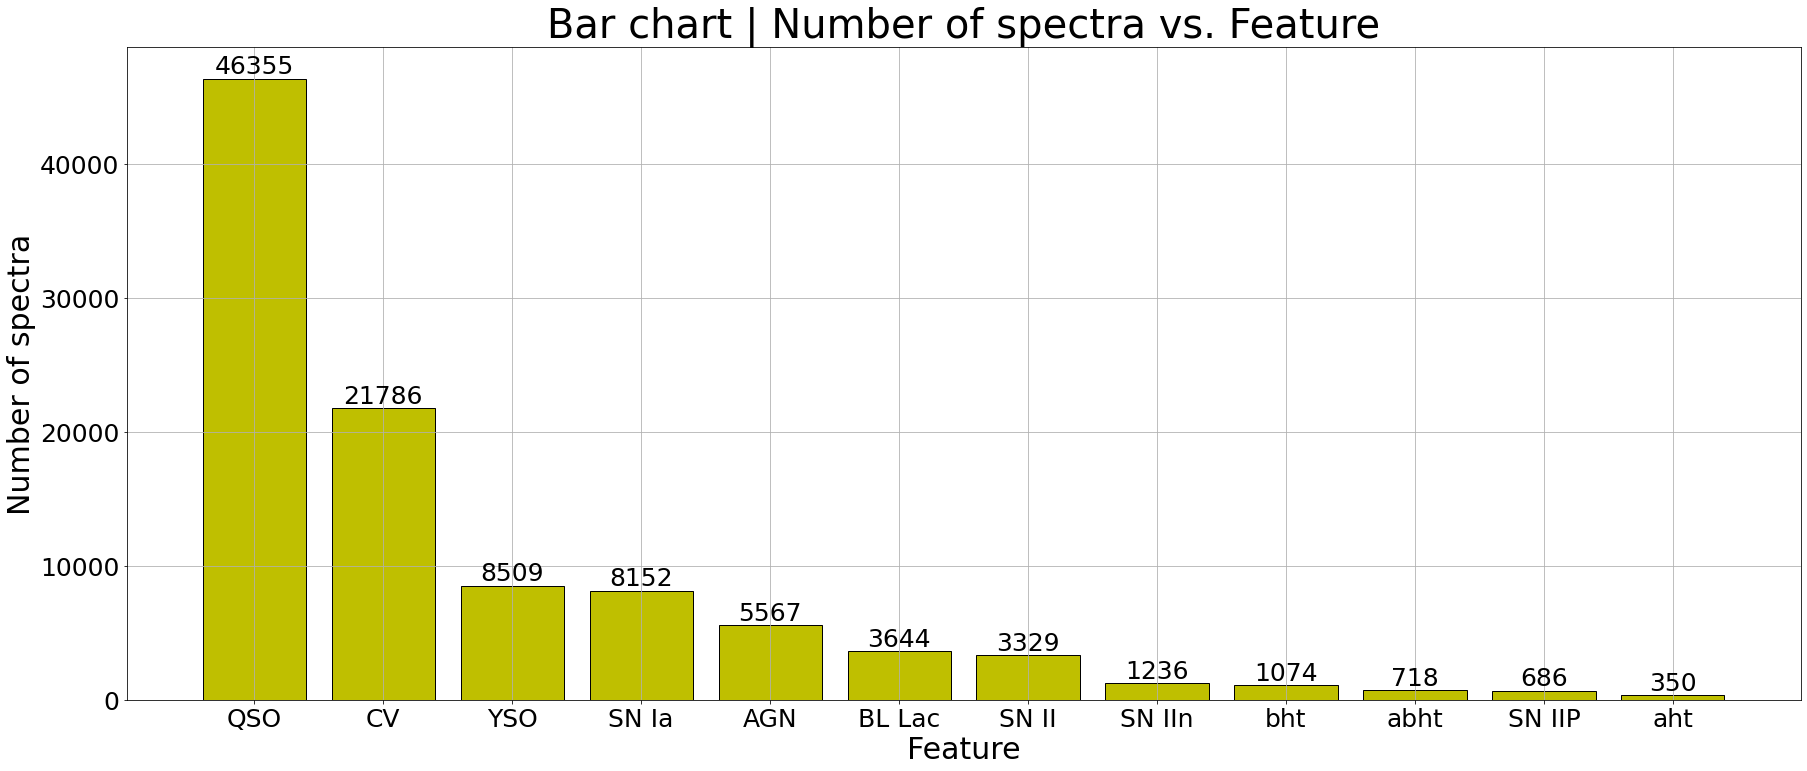

In [54]:

mpl.rcParams['font.size'] = 25
plt.figure(figsize=(30,12))
plt.bar(df_filter["feature"], df_filter["spectrums"], color='y',  edgecolor = 'black')
plt.grid()
plt.title("Bar chart | Number of spectra vs. Feature", fontsize = 40 )  
plt.xlabel("Feature", fontsize = 30 )  
plt.ylabel("Number of spectra", fontsize = 30 )  


for i in range(len(df_filter["spectrums"])):                    #Realizamos un bucle para introducir el número de escaños
    plt.text(df_filter["feature"][i], df_filter["spectrums"][i], df_filter["spectrums"][i], ha='center', va='bottom')

In [47]:
df_filter["feature"][0]

'QSO'

In [24]:
#Rename order

feature, number_spectrums = np.unique(df_spect["feature"], return_counts=True)
delete_spectrums = [feature[i] for i in range(len(feature)) if number_spectrums[i]<3000 ]
delete_spectrums

for i in range(df_spect.shape[0]):
    if df_spect["feature"][i] in delete_spectrums:
        df_spect["feature"][i] = "Other"

In [6]:
df_filter_reorder = filter_dataframe(df_spect, False).reset_index(drop=True)
df_filter_reorder

,feature,frecuencia,spectrums
0,QSO,633,46355
1,CV,457,21786
2,YSO,134,8509
3,SN Ia,1364,8152
4,AGN,78,5567
5,Other,737,4064
6,BL Lac,51,3644
7,SN II,419,3329


In [27]:
#Transformation of the array "bp" and "rp" to columns for each point
tic = timeit.default_timer()

for i in range(df_spect.shape[0]):
    for j in range(60):
        if  i ==0:
            df_spect['bp'+ str(j)] = np.nan
        df_spect['bp'+ str(j)][i]=df_spect['bp'][i][j]
    for j in range(60):
        if  i ==0:
            df_spect['rp'+ str(j)] = np.nan
        df_spect['rp'+ str(j)][i]=df_spect['rp'][i][j]
#-------------------------------------------------------------
    #Counter
    if  i % 10000 == 0:
        print("Link {}".format(i))
#-------------------------------------------------------------

toc = timeit.default_timer()
print ("Computation time = " + str((toc - tic)) + "s") 

Link 0
Link 10000
Link 20000
Link 30000
Link 40000
Link 50000
Link 60000
Link 70000
Link 80000
Link 90000
Link 100000
Computation time = 1715.1269008000004s


In [28]:
df_spect.head()

,id,order,bp,rp,a_d,feature,bp0,bp1,bp2,bp3,...,rp50,rp51,rp52,rp53,rp54,rp55,rp56,rp57,rp58,rp59
0,Gaia20ewl,0.0,"[0.6473, -0.3848, -1.4169, 0.551, 0.5189, 1.48...","[2.4698, -0.6004, 3.3294, -0.7407, -4.8109, 3....",A,SN Ia,0.6473,-0.3848,-1.4169,0.5510,...,-4.0383,1.8915,-5.1786,1.7512,-0.3190,5.6109,-6.4593,2.4706,-2.5996,1.3302
1,Gaia20ewl,1.0,"[-0.071, -0.1058, -0.1407, -1.1756, 1.7895, -0...","[2.8975, -4.055, -0.0075, 2.0401, -0.9124, -3....",D,SN Ia,-0.0710,-0.1058,-0.1407,-1.1756,...,5.2746,-0.6778,2.3697,1.4173,0.4648,0.5124,0.5599,-1.3925,-0.3450,0.7025
2,Gaia20ewk,0.0,"[2.833, -3.0936, 0.9799, 2.0533, -2.8732, -1.7...","[-0.536, 4.5025, -2.459, 0.5795, -2.382, 0.656...",A,SN Ia,2.8330,-3.0936,0.9799,2.0533,...,2.3894,4.4280,-1.5335,-0.4950,0.5435,0.5820,3.6205,-2.3410,0.6975,-2.2640
3,Gaia20ewk,1.0,"[-0.1469, 2.8954, -1.0624, -3.0201, 1.0222, 0....","[1.1083, -1.8479, -0.8041, 0.2397, 1.2835, 0.3...",D,SN Ia,-0.1469,2.8954,-1.0624,-3.0201,...,1.2976,2.3414,1.3852,5.4289,2.4727,-1.4835,0.5603,3.6041,0.6479,-3.3083
4,Gaia20evz,0.0,"[-0.0257, -3.018, 0.9896, 1.9973, 0.0049, 3.01...","[1.6737, -0.3796, -2.433, -0.4863, 1.4603, -1....",D,QSO,-0.0257,-3.0180,0.9896,1.9973,...,0.0064,-1.0470,-4.1003,-0.1536,-0.2070,2.7397,-0.3137,0.6330,-2.4204,-0.4737


In [30]:
#df_spect.to_csv('Spectrums_columns.csv')